In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import (
    datasets, metrics, model_selection as skms, linear_model, neighbors
)

In [73]:
# creating the synthetic dataset
N = 20
features = np.linspace(-10, 10, num=N)
targets = 2*features**2 - 3 + np.random.uniform(-2, 2, N)
(train_ftrs, train_trgt, test_ftrs, test_trgt) = skms.train_test_split(features, targets, test_size=N//2)
train_ftrs, train_trgt, test_ftrs, test_trgt

(array([-1.57894737, -0.52631579,  8.94736842,  6.84210526, -2.63157895,
        10.        ,  2.63157895, -3.68421053, -6.84210526,  5.78947368]),
 array([ -7.89473684, -10.        ,  -5.78947368,   7.89473684,
          1.57894737,   3.68421053,   4.73684211,  -4.73684211,
          0.52631579,  -8.94736842]),
 array([  2.24061277,  -2.03843088, 157.13229091,  92.07109663,
         12.59853119, 198.80191517,   9.64031403,  25.28206448,
         90.24756932,  64.50982236]),
 array([123.30375209, 198.34795935,  62.05605335, 120.94448303,
          2.74149712,  24.60892452,  42.70872909,  41.53776146,
         -3.03938283, 158.33709815]))

In [74]:
# displaying the dataframe based on the above training features and targets.
display(pd.DataFrame(
    {
        "features": train_ftrs,
        "targets": train_trgt
    }
).T)

,0,1,2,3,4,5,6,7,8,9
features,-1.578947,-0.526316,8.947368,6.842105,-2.631579,10.000000,2.631579,-3.684211,-6.842105,5.789474
targets,-7.894737,-10.000000,-5.789474,7.894737,1.578947,3.684211,4.736842,-4.736842,0.526316,-8.947368


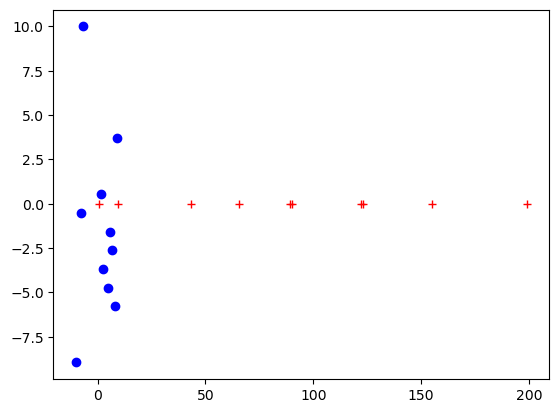

In [67]:
# plotting the dataset
plt.plot(train_ftrs, train_trgt, "bo")
plt.plot(test_ftrs, np.zeros_like(test_ftrs), "r+")
# training set is in blue dots.
# the red pluses show the input feature values for the test set.

In [68]:
skmodel = linear_model.LinearRegression()
fit = skmodel.fit(train_ftrs.reshape(-1, 1), train_trgt)
predictions = skmodel.predict(test_ftrs.reshape(-1, 1))
predictions[:3]

array([-8.82761005, -5.2996001 , -1.32638849])

In [69]:
# manually manipulating code complexity.

In [70]:
# using the polyfit routine from the numpy library.
# to fit-predict-evaluate a 1d polynomial. (a line)
model_oneD = np.poly1d(np.polyfit(train_ftrs, train_trgt, 1))
predictions_oneD = model_oneD(test_ftrs)
predictions_oneD[:3]

array([-8.82761005, -5.2996001 , -1.32638849])

In [71]:
# checking if the output from the lr model is same as that from the polyfit model.
print(f"all close? {np.allclose(predictions, predictions_oneD)}")
# calculating the RMSE of these models.
print(f"RMSE of the lr model : {np.sqrt(metrics.mean_squared_error(test_trgt, predictions))} ")
print(f"RMSE of the lr model : {np.sqrt(metrics.mean_squared_error(test_trgt, predictions_oneD))} ")

all close? True
RMSE of the lr model : 89.10945696431448 
RMSE of the lr model : 89.10945696431448 


In [72]:
# experimenting with a degree 2 polynomial, which is a parabola.
model_twoD = np.poly1d(np.polyfit(train_ftrs, train_trgt, 2))
predictions_twoD = model_twoD(test_ftrs)
predictions_twoD[:3]
# now calculating the RMSE of the degree 2 polynomial model.
print(f"RMSE of the degree-2 model : {np.sqrt(metrics.mean_squared_error(test_trgt, predictions_twoD))}")

RMSE of the degree-2 model : 558.8877676785187
